In [1]:
library(ArchR)
library(dplyr)
library(tidyr)
library(parallel)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
projdir = '/nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis'

addArchRGenome("mm10")
addArchRThreads(threads = 45) 

projAging2 = readRDS(file.path(projdir, "Save-projAging2-01", 'Save-ArchR-Project.rds'))

Setting default genome to Mm10.

Setting default number of Parallel threads to 45.



# First round of dimension reduction and visualization

## Estimated LSI

### 15k var features, 30dims, 3 iterations, no scaling

In [3]:
projAging3 <- addIterativeLSI(
    ArchRProj = projAging2,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.05, 0.1),
        sampleCells = 10000, 
        n.start = 10,
        algorithm = 2
    ), 
    varFeatures = 15000, 
    dimsToUse = 1:30,
    scaleDims = FALSE,
    force = TRUE
)


Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-f56c3644434d-Date-2022-12-22_Time-22-11-40.log
If there is an issue, please report to github with logFile!

2022-12-22 22:11:45 : Computing Total Across All Features, 0.071 mins elapsed.

2022-12-22 22:11:54 : Computing Top Features, 0.231 mins elapsed.

###########
2022-12-22 22:11:56 : Running LSI (1 of 3) on Top Features, 0.253 mins elapsed.
###########

2022-12-22 22:11:56 : Sampling Cells (N = 10002) for Estimated LSI, 0.254 mins elapsed.

2022-12-22 22:11:56 : Creating Sampled Partial Matrix, 0.254 mins elapsed.

2022-12-22 22:12:31 : Computing Estimated LSI (projectAll = FALSE), 0.841 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2022-12-22 22:12:55 : Identifying Clusters, 1.245 mins elapsed.

2022-12-22 22:13:14 : Identified 3 Clusters, 1.559 mins elapsed.

2022-12-22 22:13:14 : Saving LSI Iteration, 1.559 mins elapsed.

2022-12-22 22:13:31 : Creating Cluster Matrix on the total Grou

### 15k var features, 30dims, 4 iterations, no scaling

In [4]:
projAging3 <- addIterativeLSI(
    ArchRProj = projAging3,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI_4iter", 
    iterations = 4, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.05, 0.1, 0.2),
        sampleCells = 10000, 
        n.start = 10,
        algorithm = 2
    ), 
    varFeatures = 15000, 
    dimsToUse = 1:30,
    scaleDims = FALSE,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-f56c35d9c651-Date-2022-12-22_Time-22-16-55.log
If there is an issue, please report to github with logFile!

2022-12-22 22:16:59 : Computing Total Across All Features, 0.063 mins elapsed.

2022-12-22 22:17:05 : Computing Top Features, 0.16 mins elapsed.

###########
2022-12-22 22:17:07 : Running LSI (1 of 4) on Top Features, 0.187 mins elapsed.
###########

2022-12-22 22:17:07 : Sampling Cells (N = 10002) for Estimated LSI, 0.188 mins elapsed.

2022-12-22 22:17:07 : Creating Sampled Partial Matrix, 0.188 mins elapsed.

2022-12-22 22:17:35 : Computing Estimated LSI (projectAll = FALSE), 0.661 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2022-12-22 22:18:01 : Identifying Clusters, 1.094 mins elapsed.

2022-12-22 22:18:17 : Identified 3 Clusters, 1.359 mins elapsed.

2022-12-22 22:18:17 : Saving LSI Iteration, 1.359 mins elapsed.

2022-12-22 22:18:34 : Creating Cluster Matrix on the total Group

### 10k var features, 30dims, 4 iterations, no scaling

In [5]:
projAging3 <- addIterativeLSI(
    ArchRProj = projAging3,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI_4iter_10kvar", 
    iterations = 4, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.05, 0.1, 0.2),
        sampleCells = 10000, 
        n.start = 10,
        algorithm = 2
    ), 
    varFeatures = 10000, 
    dimsToUse = 1:30,
    scaleDims = FALSE,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-f56c45daf0df-Date-2022-12-22_Time-22-23-37.log
If there is an issue, please report to github with logFile!

2022-12-22 22:23:41 : Computing Total Across All Features, 0.066 mins elapsed.

2022-12-22 22:23:47 : Computing Top Features, 0.162 mins elapsed.

###########
2022-12-22 22:23:49 : Running LSI (1 of 4) on Top Features, 0.19 mins elapsed.
###########

2022-12-22 22:23:49 : Sampling Cells (N = 10002) for Estimated LSI, 0.192 mins elapsed.

2022-12-22 22:23:49 : Creating Sampled Partial Matrix, 0.192 mins elapsed.

2022-12-22 22:24:13 : Computing Estimated LSI (projectAll = FALSE), 0.601 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2022-12-22 22:24:42 : Identifying Clusters, 1.081 mins elapsed.

2022-12-22 22:24:58 : Identified 6 Clusters, 1.354 mins elapsed.

2022-12-22 22:24:58 : Saving LSI Iteration, 1.354 mins elapsed.

2022-12-22 22:25:15 : Creating Cluster Matrix on the total Group

## UMAP of Estimated LSI

In [6]:
for(dims in c("IterativeLSI", "IterativeLSI_4iter", "IterativeLSI_4iter_10kvar")) {
    projAging3 <- addUMAP(
        ArchRProj = projAging3, 
        reducedDims = dims, 
        name = gsub("_IterativeLSI", "", paste("UMAP", dims, sep="_"), fixed=TRUE),
        nNeighbors = 30,
        minDist = 0.5,
        metric = "cosine",
        force = TRUE
    )
}

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

22:29:55 UMAP embedding parameters a = 0.583 b = 1.334

22:29:55 Read 24930 rows and found 29 numeric columns

22:29:55 Using Annoy for neighbor search, n_neighbors = 30

22:29:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:29:59 Writing NN index file to temp file /tmp/Rtmps8QUE2/filef56c5e58e842

22:29:59 Searching Annoy index using 32 threads, search_k = 3000

22:29:59 Annoy recall = 100%

22:30:00 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

22:30:02 Initializing from normalized Laplacian + noise (using irlba)

22:30:03 Commencing optimization for 200 epochs, with 1112276 positive edges

22:30:17 Optimization finished

22:30:17 Creating temp model dir /tmp/Rt

In [8]:
projAging3@embeddings

List of length 3
names(3): UMAP UMAP_4iter UMAP_4iter_10kvar

# Harmony batch correction

## Run Harmony

### By sample

In [9]:
for(dims in c("IterativeLSI", "IterativeLSI_4iter", "IterativeLSI_4iter_10kvar")) {
    projAging3 <- addHarmony(
        ArchRProj = projAging3,
        reducedDims = dims,
        name = gsub("_IterativeLSI", "", paste("Harmony", dims, sep="_"), fixed=TRUE),
        groupBy = "Sample",
        plot_convergence = TRUE,
        max.iter.cluster = 400,
        force = TRUE
        )
    }


Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



### By age

In [13]:
for(dims in c("IterativeLSI", "IterativeLSI_4iter", "IterativeLSI_4iter_10kvar")) {
    projAging3 <- addHarmony(
        ArchRProj = projAging3,
        reducedDims = dims,
        name = gsub("_IterativeLSI", "", paste("Harmony_Age", dims, sep="_"), fixed=TRUE),
        groupBy = "Age",
        plot_convergence = TRUE,
        max.iter.cluster = 400,
        force = TRUE
        )
    }


Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



In [15]:
names(projAging3@reducedDims)

[1] "IterativeLSI"              "IterativeLSI_4iter"       
[3] "IterativeLSI_4iter_10kvar" "Harmony"                  
[5] "Harmony_4iter"             "Harmony_4iter_10kvar"     
[7] "Harmony_Age"               "Harmony_Age_4iter"        
[9] "Harmony_Age_4iter_10kvar"

## Harmony UMAP

### By sample

In [16]:
for(dims in c("Harmony", "Harmony_4iter", "Harmony_4iter_10kvar")) {
    projAging3 <- addUMAP(
        ArchRProj = projAging3, 
        reducedDims = dims, 
        name = paste("UMAP", dims, sep="_"),
        nNeighbors = 50, 
        minDist = 0.3, 
        metric = "cosine",
        force = TRUE
    )
}

22:55:49 UMAP embedding parameters a = 0.9922 b = 1.112

22:55:49 Read 24930 rows and found 29 numeric columns

22:55:49 Using Annoy for neighbor search, n_neighbors = 50

22:55:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:55:53 Writing NN index file to temp file /tmp/Rtmps8QUE2/filef56c7fa1a29f

22:55:53 Searching Annoy index using 32 threads, search_k = 5000

22:55:53 Annoy recall = 100%

22:55:54 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 50

22:55:57 Initializing from normalized Laplacian + noise (using irlba)

22:55:59 Commencing optimization for 200 epochs, with 1823882 positive edges

22:56:18 Optimization finished

22:56:18 Creating temp model dir /tmp/Rtmps8QUE2/dirf56c74192a3c

22:56:18 Creating dir /tmp/Rt

### By age

In [18]:
for(dims in c("Harmony_Age", "Harmony_Age_4iter", "Harmony_Age_4iter_10kvar")) {
    projAging3 <- addUMAP(
        ArchRProj = projAging3, 
        reducedDims = dims, 
        name = paste("UMAP", dims, sep="_"),
        nNeighbors = 50, 
        minDist = 0.3, 
        metric = "cosine",
        force = TRUE
    )
}

22:59:04 UMAP embedding parameters a = 0.9922 b = 1.112

22:59:04 Read 24930 rows and found 29 numeric columns

22:59:04 Using Annoy for neighbor search, n_neighbors = 50

22:59:04 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:59:08 Writing NN index file to temp file /tmp/Rtmps8QUE2/filef56c2ec42481

22:59:08 Searching Annoy index using 32 threads, search_k = 5000

22:59:08 Annoy recall = 100%

22:59:09 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 50

22:59:11 Initializing from normalized Laplacian + noise (using irlba)

22:59:14 Commencing optimization for 200 epochs, with 1801832 positive edges

22:59:33 Optimization finished

22:59:33 Creating temp model dir /tmp/Rtmps8QUE2/dirf56c13f7bd49

22:59:33 Creating dir /tmp/Rt

In [19]:
names(projAging3@embeddings)

[1] "UMAP"                          "UMAP_4iter"                   
[3] "UMAP_4iter_10kvar"             "UMAP_Harmony"                 
[5] "UMAP_Harmony_4iter"            "UMAP_Harmony_4iter_10kvar"    
[7] "UMAP_Harmony_Age"              "UMAP_Harmony_Age_4iter"       
[9] "UMAP_Harmony_Age_4iter_10kvar"

In [24]:
p1 <- plotEmbedding(projAging3, embedding = 'UMAP_Harmony_4iter', colorBy='cellColData', name='Age', highlightCells = getCellNames(projAging3[projAging3$Age=='Aged']))
p2 <- plotEmbedding(projAging3, embedding = 'UMAP_Harmony_4iter', colorBy='cellColData', name='Age', highlightCells = getCellNames(projAging3[projAging3$Age=='Young']))
p3 <- plotEmbedding(projAging3, embedding = 'UMAP_Age_Harmony_4iter', colorBy='cellColData', name='Age', highlightCells = getCellNames(projAging3[projAging3$Age=='Aged']))
p4 <- plotEmbedding(projAging3, embedding = 'UMAP_Age_Harmony_4iter', colorBy='cellColData', name='Age', highlightCells = getCellNames(projAging3[projAging3$Age=='Young']))

png(file.path(projdir, 'output', 'tmp.png'), res=300, units='in', width=12, height=4)
ggAlignPlots(p1, p2, p3, p4, type = 'h')
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e54766640c11-Date-2022-12-22_Time-20-01-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e54766640c11-Date-2022-12-22_Time-20-01-42.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e5472c96085d-Date-2022-12-22_Time-20-01-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e5472c96085d-Date-2022-12-22_Time-20-01-43.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-e54757ab1479-Date-2022-12-22_Time-20-01-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-e54757ab1479-Date-2022-12-22_Time-20-

png 
  2

## Make plots

In [21]:
sample_plt_list <- lapply(names(projAging3@embeddings), function(x) plotEmbedding(projAging3, embedding = x, colorBy = 'cellColData', name = 'Sample'))
age_plt_list <- lapply(names(projAging3@embeddings), function(x) plotEmbedding(projAging3, embedding = x, colorBy = 'cellColData', name = 'Age'))

plotPDF(plotList = sample_plt_list, ArchRProj = projAging3, name = 'Plot-UMAP-Sample-Split.pdf')
plotPDF(plotList = age_plt_list, ArchRProj = projAging3, name = 'Plot-UMAP-Age-Split.pdf')

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c2ae3fbd1-Date-2022-12-22_Time-23-09-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c2ae3fbd1-Date-2022-12-22_Time-23-09-56.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c49ac9329-Date-2022-12-22_Time-23-09-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c49ac9329-Date-2022-12-22_Time-23-09-57.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c6558ed6d-Date-2022-12-22_Time-23-09-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c6558ed6d-Date-2022-12-22_Time-23-

In [30]:
hilite_plt_list <- vector(mode='list', 2*length(names(projAging3@embeddings)))

for(e in names(projAging3@embeddings)) {
    for(age in c('Young', 'Aged')) {
        hilite_plt_list[[paste(age, e, sep="_")]] <- plotEmbedding(projAging3, 
                                                                   embedding = e, 
                                                                   colorBy = 'cellColData', 
                                                                   name = 'Age', 
                                                                   highlightCells = getCellNames(projAging3[projAging3$Age==age]),
                                                                   pal = c(Aged = ggsci::pal_nejm()(2)[1], 
                                                                           Young = ggsci::pal_nejm()(2)[2], 
                                                                           'Non.Highlighted' = 'lightgray'))
    }
}
                            
plotPDF(plotList = hilite_plt_list, ArchRProj = projAging3, name = 'Plot-UMAP-Age-Highlight.pdf')

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c55f6256f-Date-2022-12-22_Time-23-38-33.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c55f6256f-Date-2022-12-22_Time-23-38-33.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c3760dac8-Date-2022-12-22_Time-23-38-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c3760dac8-Date-2022-12-22_Time-23-38-34.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c69e053e2-Date-2022-12-22_Time-23-38-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c69e053e2-Date-2022-12-22_Time-23-

# Calculate correlation between replicates

In [13]:
projAging3_scoreMat <- getMatrixFromProject(projAging3, useMatrix = "GeneScoreMatrix")

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-b5cd1ae637d0-Date-2022-12-22_Time-00-41-48.log
If there is an issue, please report to github with logFile!

2022-12-22 00:43:03 : Organizing colData, 1.26 mins elapsed.

2022-12-22 00:43:04 : Organizing rowData, 1.262 mins elapsed.

2022-12-22 00:43:04 : Organizing rowRanges, 1.262 mins elapsed.

2022-12-22 00:43:04 : Organizing Assays (1 of 1), 1.263 mins elapsed.

2022-12-22 00:43:14 : Constructing SummarizedExperiment, 1.432 mins elapsed.

2022-12-22 00:43:15 : Finished Matrix Creation, 1.45 mins elapsed.



In [14]:
rowAvg_score <- data.frame(Aged = rowMeans(assay(projAging3_scoreMat[, projAging3_scoreMat$Sample == "Aged"])),
                         Aged_v2 = rowMeans(assay(projAging3_scoreMat[, projAging3_scoreMat$Sample == "Aged_v2"])),
                         Young = rowMeans(assay(projAging3_scoreMat[, projAging3_scoreMat$Sample == "Young"])),
                         Young_v2 = rowMeans(assay(projAging3_scoreMat[, projAging3_scoreMat$Sample == "Young_v2"])))
rowAvg_score <- apply(rowAvg_score, 2, function(x) log2(x + 1))

In [15]:
rowAvg_score_pltdf <- as.data.frame(rbind(rowAvg_score[,c("Aged","Aged_v2")], rowAvg_score[,c("Young","Young_v2")]))
rowAvg_score_pltdf$Age <- rep(c("Aged","Young"), each=nrow(rowAvg_score))
colnames(rowAvg_score_pltdf) = c("x","y","Age")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



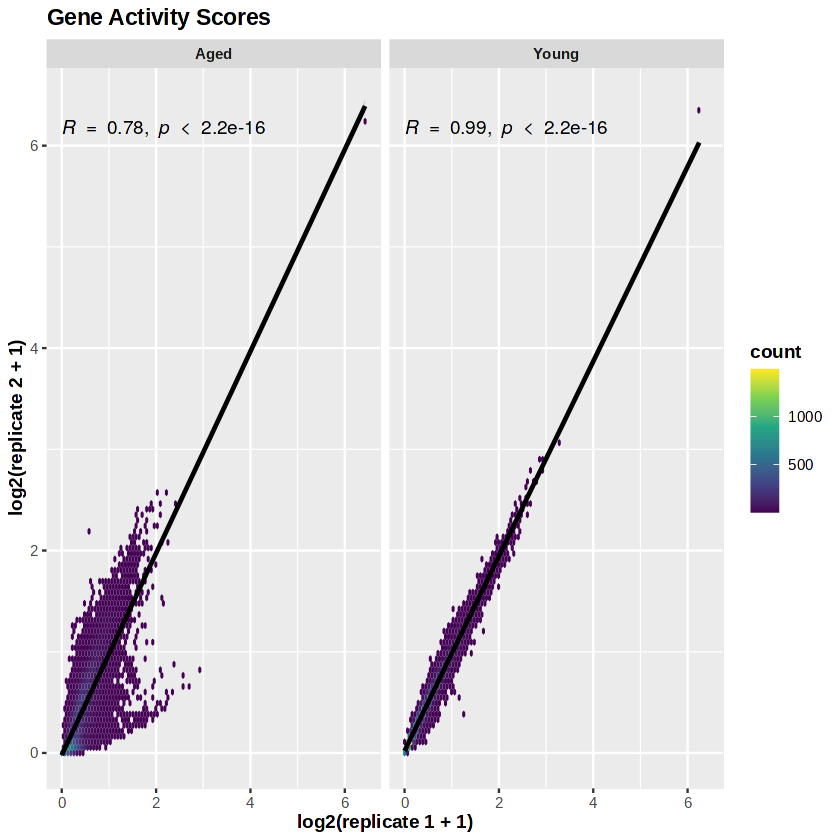

In [16]:
ggplot(rowAvg_score_pltdf, aes(x=x, y=y)) + 
    facet_wrap(~Age) + 
    geom_hex(bins = 100) + 
    stat_smooth(method="lm", color="black", se = TRUE) + 
    scale_fill_viridis_c() + 
    ggtitle('Gene Activity Scores') +
    labs(x = 'log2(replicate 1 + 1)', y = 'log2(replicate 2 + 1)') +
    ggpubr::stat_cor(method = "pearson") +
    theme(text = element_text(family = "Arial"),
          strip.text = element_text(face="bold"),
          axis.title = element_text(face="bold"),
          title = element_text(face="bold"))
ggsave(file.path(projdir, 'output', 'Plots', 'GeneActivityScore_replicate_correlations.png'), dpi=300, width=6, height=4)

In [31]:
saveRDS(projAging3, file.path(projdir, "output", "projAging3-01.RDS"))
#projAging3 <- readRDS(file.path(projdir, "output", "projAging3-01.RDS"))

In [18]:
saveRDS(projAging3_scoreMat, file.path(projdir, "output", "projAging3-01-scoreMat.RDS"))

# Imputation of gene score matrix

In [32]:
markerGenes  <- c("Fabp4","Cdh5","Pecam1",
                   "Gsn","Col3a1","Pdgfra",
                   "Thbs4","Fmod","Tnmd",
                   "Pax7","Sdc4","Myod1",
                   "Myh11","Synpo2","Acta2",
                   "Rgs5","Pdgfrb","Kcnj8",
                   "Cd74","H2-Aa","Bach2",
                   "Ptpn22","Il7r","Ptprc",
                   "Lyz2","Ctsb","Ctsz",
                   "S100a9","S100a8","Mmp9",
                   "Cdh19","Ptn","Postn",
                   "Bnc2","Apod","Itgb4",
                   "Mpz","Plp1","Mbp",
                   "Hba-a1","Hba-a2","Hbb-bs")

## Sample Harmony plot

### Look at a few embeddings to see which MAGIC imputation looks best

#### Harmony Age

In [38]:
projAging3 <- addImputeWeights(projAging3, reducedDims = 'Harmony_Age')

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-f56c548a6430-Date-2022-12-23_Time-00-07-02.log
If there is an issue, please report to github with logFile!

2022-12-23 00:07:03 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [39]:
gene_plts <- plotEmbedding(
    ArchRProj = projAging3, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Harmony_Age",
    imputeWeights = getImputeWeights(projAging3)
)
plotPDF(plotList = gene_plts, 
    name = "Plot-UMAP-Marker-Genes-Harmony_Age.pdf", 
    ArchRProj = projAging3, 
    addDOC = FALSE, width = 4, height = 4)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c1dcd4202-Date-2022-12-23_Time-00-08-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-12-23 00:08:37 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c1dcd4202-Date-2022-12-23_Time-00-08-34.log

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plott

#### Harmony

In [40]:
projAging3 <- addImputeWeights(projAging3, reducedDims = 'Harmony')

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-f56c43ab344d-Date-2022-12-23_Time-00-14-54.log
If there is an issue, please report to github with logFile!

2022-12-23 00:14:54 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [41]:
gene_plts <- plotEmbedding(
    ArchRProj = projAging3, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Harmony",
    imputeWeights = getImputeWeights(projAging3)
)
plotPDF(plotList = gene_plts, 
    name = "/ChoosingDimReduction/Plot-UMAP-Marker-Genes-Harmony.pdf", 
    ArchRProj = projAging3, 
    addDOC = FALSE, width = 4, height = 4)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c1124a855-Date-2022-12-23_Time-00-15-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-12-23 00:15:46 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c1124a855-Date-2022-12-23_Time-00-15-42.log

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plott

#### Harmony 4 iterations

In [42]:
projAging3 <- addImputeWeights(projAging3, reducedDims = 'Harmony_4iter')

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-f56c4045cd79-Date-2022-12-23_Time-00-46-09.log
If there is an issue, please report to github with logFile!

2022-12-23 00:46:10 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [43]:
gene_plts <- plotEmbedding(
    ArchRProj = projAging3, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Harmony_4iter",
    imputeWeights = getImputeWeights(projAging3)
)
plotPDF(plotList = gene_plts, 
    name = "/ChoosingDimReduction/Plot-UMAP-Marker-Genes-Harmony-4iter.pdf", 
    ArchRProj = projAging3, 
    addDOC = FALSE, width = 4, height = 4)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c6a371c6a-Date-2022-12-23_Time-00-46-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-12-23 00:46:49 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c6a371c6a-Date-2022-12-23_Time-00-46-46.log

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plott

# Add Seurat clusters

**Looks like Harmony_4iter and Harmony_Age are the best**

In [45]:
for (res in c(0.1, 0.2, 0.3)) {
    projAging3 <- addClusters(
        input = projAging3,
        reducedDims = "Harmony_4iter",
        method = "Seurat",
        name = paste0("Harmony_4iter_Clusters_res", as.character(res)),
        resolution = res, 
        nOutlier = 20,
        force = TRUE
    )   
}

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c5dcaa67c-Date-2022-12-23_Time-00-54-59.log
If there is an issue, please report to github with logFile!

2022-12-23 00:55:00 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 956184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9677
Number of communities: 7
Elapsed time: 4 seconds


2022-12-23 00:55:38 : Testing Outlier Clusters, 0.633 mins elapsed.

2022-12-23 00:55:38 : Assigning Cluster Names to 7 Clusters, 0.633 mins elapsed.

2022-12-23 00:55:38 : Finished addClusters, 0.635 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c2a59663b-Date-2022-12-23_Time-00-55-38.log
If there is an issue, please report to github with logFile!

2022-12-23 00:55:39 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 956184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9528
Number of communities: 9
Elapsed time: 4 seconds


2022-12-23 00:56:16 : Testing Outlier Clusters, 0.614 mins elapsed.

2022-12-23 00:56:16 : Assigning Cluster Names to 9 Clusters, 0.614 mins elapsed.

2022-12-23 00:56:16 : Finished addClusters, 0.615 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c6247abf2-Date-2022-12-23_Time-00-56-16.log
If there is an issue, please report to github with logFile!

2022-12-23 00:56:16 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 956184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9403
Number of communities: 13
Elapsed time: 4 seconds


2022-12-23 00:56:53 : Testing Outlier Clusters, 0.622 mins elapsed.

2022-12-23 00:56:53 : Assigning Cluster Names to 13 Clusters, 0.622 mins elapsed.

2022-12-23 00:56:54 : Finished addClusters, 0.624 mins elapsed.



In [46]:
for (res in c(0.1, 0.2, 0.3)) {
    projAging3 <- addClusters(
        input = projAging3,
        reducedDims = "Harmony_Age",
        method = "Seurat",
        name = paste0("Harmony_Age_Clusters_res", as.character(res)),
        resolution = res, 
        nOutlier = 20,
        force = TRUE
    )   
}

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c546a26db-Date-2022-12-23_Time-00-56-54.log
If there is an issue, please report to github with logFile!

2022-12-23 00:56:55 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 934113

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9720
Number of communities: 9
Elapsed time: 4 seconds


2022-12-23 00:57:32 : Testing Outlier Clusters, 0.617 mins elapsed.

2022-12-23 00:57:32 : Assigning Cluster Names to 9 Clusters, 0.617 mins elapsed.

2022-12-23 00:57:32 : Finished addClusters, 0.619 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c2d8eefea-Date-2022-12-23_Time-00-57-32.log
If there is an issue, please report to github with logFile!

2022-12-23 00:57:32 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 934113

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9582
Number of communities: 13
Elapsed time: 4 seconds


2022-12-23 00:58:10 : Testing Biased Clusters, 0.632 mins elapsed.

2022-12-23 00:58:10 : Testing Outlier Clusters, 0.633 mins elapsed.

2022-12-23 00:58:10 : Assigning Cluster Names to 13 Clusters, 0.633 mins elapsed.

2022-12-23 00:58:10 : Finished addClusters, 0.634 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c47c5184e-Date-2022-12-23_Time-00-58-10.log
If there is an issue, please report to github with logFile!

2022-12-23 00:58:11 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24930
Number of edges: 934113

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9482
Number of communities: 16
Elapsed time: 4 seconds


2022-12-23 00:58:46 : Testing Biased Clusters, 0.594 mins elapsed.

2022-12-23 00:58:46 : Testing Outlier Clusters, 0.596 mins elapsed.

2022-12-23 00:58:46 : Assigning Cluster Names to 16 Clusters, 0.596 mins elapsed.

2022-12-23 00:58:46 : Finished addClusters, 0.598 mins elapsed.



## Look at the distribution of samples across clusters

In [48]:
cM <- confusionMatrix(paste0(projAging3$Harmony_4iter_Clusters_res0.3), paste0(projAging3$Age))

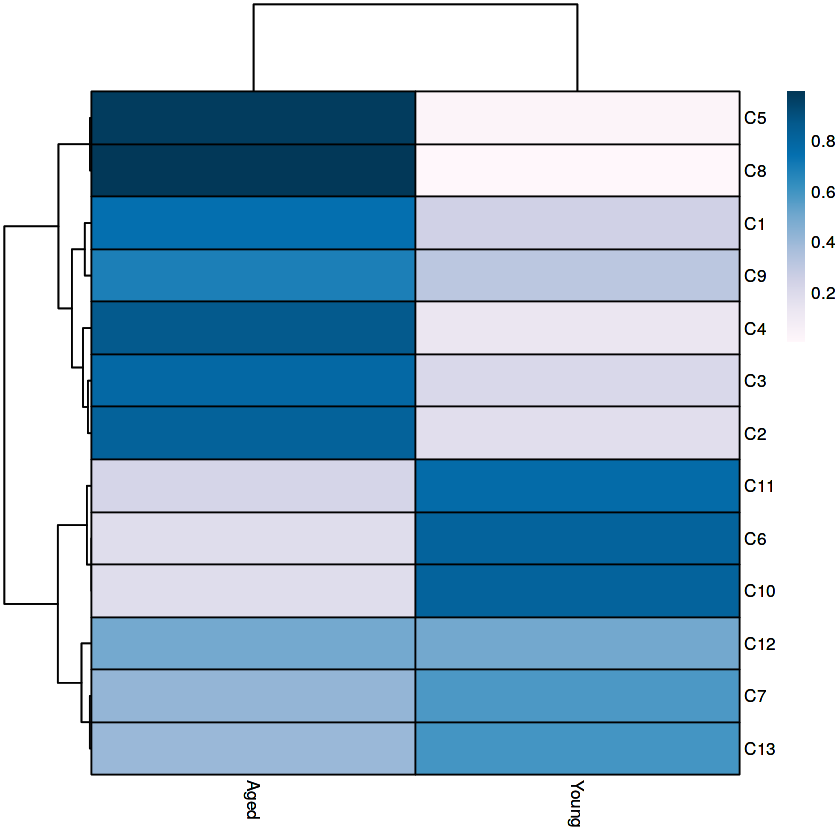

In [49]:
library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
pM <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
pM


## Visualize clustering 

In [51]:
plt_list <- lapply(paste0('res',c(0.1,0.2,0.3)), function(x) 
    plotEmbedding(projAging3, embedding="UMAP_Harmony_4iter", colorBy="cellColData", name=paste0("Harmony_4iter_Clusters_", x)))

plotPDF(plotList = plt_list, 
        name = "Plot-UMAP-ATAC-Clustering-Harmony_4iter.pdf", 
        ArchRProj = projAging3, 
        addDOC = FALSE, width = 4, height = 4)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c844005e-Date-2022-12-23_Time-01-00-54.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c844005e-Date-2022-12-23_Time-01-00-54.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c7b4ed1b-Date-2022-12-23_Time-01-00-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c7b4ed1b-Date-2022-12-23_Time-01-00-56.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c5ec57bce-Date-2022-12-23_Time-01-00-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c5ec57bce-Date-2022-12-23_Time-01-00-5

In [53]:
plt_list <- lapply(paste0('res',c(0.1,0.2,0.3)), function(x) 
    plotEmbedding(projAging3, embedding="UMAP_Harmony_Age", colorBy="cellColData", name=paste0("Harmony_Age_Clusters_", x)))

plotPDF(plotList = plt_list, 
        name = "Plot-UMAP-ATAC-Clustering-Harmony_Age.pdf", 
        ArchRProj = projAging3, 
        addDOC = FALSE, width = 4, height = 4)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c1e71c3c8-Date-2022-12-23_Time-01-05-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c1e71c3c8-Date-2022-12-23_Time-01-05-01.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c7c31e651-Date-2022-12-23_Time-01-05-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c7c31e651-Date-2022-12-23_Time-01-05-02.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c102b6780-Date-2022-12-23_Time-01-05-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c102b6780-Date-2022-12-23_Time-01-

## Subclustering

### It looks like the Harmony_4iter clustering is good, but tenocytes and macrophages/immune cells can be subclustered

#### Subcluster MSC cluster to extract tenocytes

In [105]:
MSC_subset <- projAging3[projAging3$Harmony_4iter_Clusters_res0.2 == 'C1', ]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [119]:
for (res in seq(0.05,0.1,0.01)) {
    MSC_subset <- addClusters(
        input = MSC_subset,
        reducedDims = "Harmony_4iter",
        method = "Seurat",
        name = paste0("MSC_subset_cluster_res", as.character(res)),
        resolution = res, 
        force = TRUE
    )   
}

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c33a803b2-Date-2022-12-23_Time-02-34-18.log
If there is an issue, please report to github with logFile!

Overriding previous entry for MSC_subset_cluster_res0.05

2022-12-23 02:34:18 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9500
Number of communities: 1
Elapsed time: 0 seconds


2022-12-23 02:34:26 : Testing Outlier Clusters, 0.135 mins elapsed.

2022-12-23 02:34:26 : Assigning Cluster Names to 1 Clusters, 0.135 mins elapsed.

2022-12-23 02:34:26 : Finished addClusters, 0.139 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c483a3881-Date-2022-12-23_Time-02-34-26.log
If there is an issue, please report to github with logFile!

2022-12-23 02:34:27 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9414
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:34:35 : Testing Outlier Clusters, 0.133 mins elapsed.

2022-12-23 02:34:35 : Assigning Cluster Names to 2 Clusters, 0.133 mins elapsed.

2022-12-23 02:34:35 : Finished addClusters, 0.134 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c24e6a270-Date-2022-12-23_Time-02-34-35.log
If there is an issue, please report to github with logFile!

2022-12-23 02:34:36 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9357
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:34:43 : Testing Outlier Clusters, 0.136 mins elapsed.

2022-12-23 02:34:43 : Assigning Cluster Names to 2 Clusters, 0.136 mins elapsed.

2022-12-23 02:34:44 : Finished addClusters, 0.138 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c3e2c1ac2-Date-2022-12-23_Time-02-34-44.log
If there is an issue, please report to github with logFile!

2022-12-23 02:34:44 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9311
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:34:51 : Testing Outlier Clusters, 0.124 mins elapsed.

2022-12-23 02:34:51 : Assigning Cluster Names to 2 Clusters, 0.124 mins elapsed.

2022-12-23 02:34:52 : Finished addClusters, 0.126 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c63bf978f-Date-2022-12-23_Time-02-34-52.log
If there is an issue, please report to github with logFile!

2022-12-23 02:34:52 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9270
Number of communities: 3
Elapsed time: 0 seconds


2022-12-23 02:35:00 : Testing Outlier Clusters, 0.13 mins elapsed.

2022-12-23 02:35:00 : Assigning Cluster Names to 3 Clusters, 0.13 mins elapsed.

2022-12-23 02:35:00 : Finished addClusters, 0.132 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c1f4e46be-Date-2022-12-23_Time-02-35-00.log
If there is an issue, please report to github with logFile!

Overriding previous entry for MSC_subset_cluster_res0.1

2022-12-23 02:35:00 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5909
Number of edges: 215708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9230
Number of communities: 3
Elapsed time: 0 seconds


2022-12-23 02:35:08 : Testing Outlier Clusters, 0.13 mins elapsed.

2022-12-23 02:35:08 : Assigning Cluster Names to 3 Clusters, 0.13 mins elapsed.

2022-12-23 02:35:08 : Finished addClusters, 0.131 mins elapsed.



In [122]:
table(MSC_subset$MSC_subset_cluster_res0.05); 
table(MSC_subset$MSC_subset_cluster_res0.06); 
table(MSC_subset$MSC_subset_cluster_res0.07); 
table(MSC_subset$MSC_subset_cluster_res0.08);
table(MSC_subset$MSC_subset_cluster_res0.09); 
table(MSC_subset$MSC_subset_cluster_res0.1);


  C1 
5909 


  C1   C2 
5281  628 


  C1   C2 
3344 2565 


  C1   C2 
3302 2607 


  C1   C2   C3 
1754 3309  846 


  C1   C2   C3 
1753 3308  848 

In [121]:
MSC_subset@cellColData

DataFrame with 5909 rows and 29 columns
                            Sample TSSEnrichment ReadsInTSS ReadsInPromoter
                             <Rle>       <array>    <array>         <array>
Aged_v2#GGCTCAATCCTGAATA-1 Aged_v2        19.155      12488           46041
Aged_v2#CGCCACACAGGCTAAG-1 Aged_v2        11.899       7812           32039
Aged_v2#GTTAGGCGTTGTTGGA-1 Aged_v2        16.136       8320           30273
Aged_v2#GGCAAGCCAGGAAGCC-1 Aged_v2        15.771       7327           27857
Aged_v2#CAATATGTCATTAGCA-1 Aged_v2        20.652      10492           36105
...                            ...           ...        ...             ...
Young#TTAACTGAGCTATATG-1     Young        22.682        252             916
Young#ACGTTACAGCACAGGG-1     Young         20.99        212             790
Young#TTCGTGCTCAAAGGCA-1     Young        23.168        234             938
Young#TCCTCTAAGAGCCGGA-1     Young        28.812        291             952
Young#TAGCTTGCATAGGCGA-1     Young        20.693

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c727490e2-Date-2022-12-23_Time-02-41-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c727490e2-Date-2022-12-23_Time-02-41-40.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c15400a4c-Date-2022-12-23_Time-02-41-43.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c15400a4c-Date-2022-12-23_Time-02-41-43.log



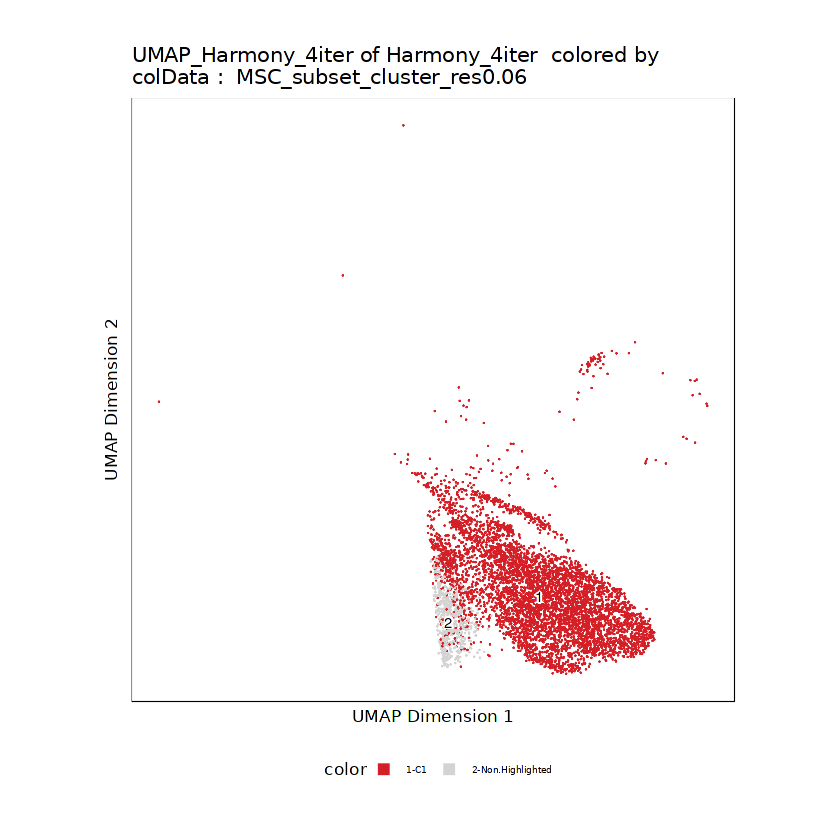

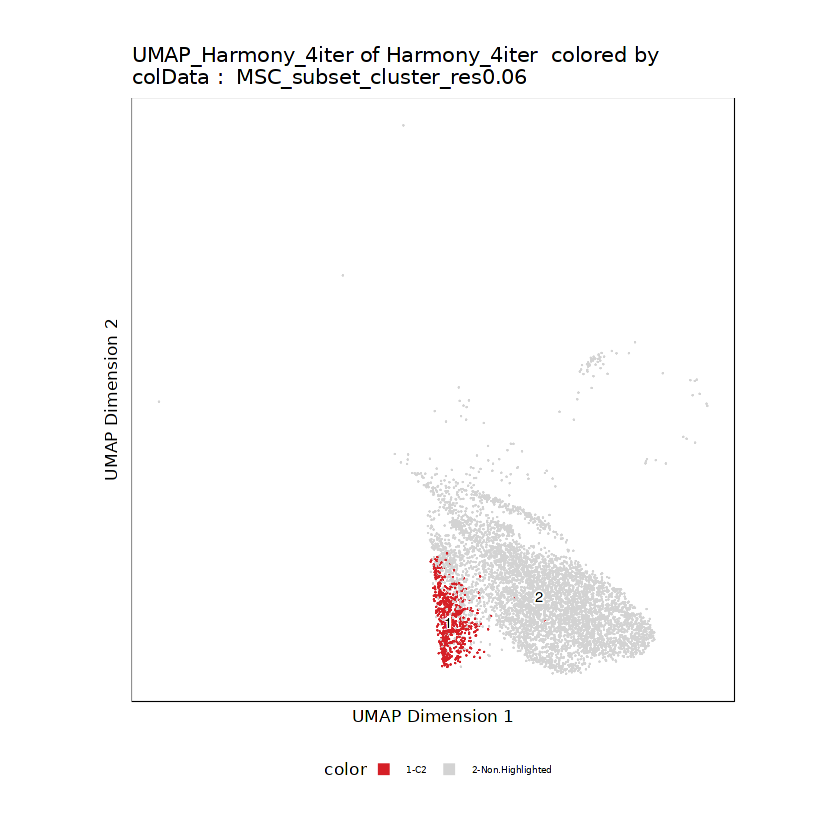

In [126]:
plotEmbedding(MSC_subset, embedding = 'UMAP_Harmony_4iter', colorBy = 'cellColData', name = 'MSC_subset_cluster_res0.06', 
              highlightCells = getCellNames(MSC_subset[MSC_subset$MSC_subset_cluster_res0.06=='C1']))
plotEmbedding(MSC_subset, embedding = 'UMAP_Harmony_4iter', colorBy = 'cellColData', name = 'MSC_subset_cluster_res0.06', 
              highlightCells = getCellNames(MSC_subset[MSC_subset$MSC_subset_cluster_res0.06=='C2']))

#### Subcluster macrophage cluster

In [129]:
macrophage_subset <- projAging3[projAging3$Harmony_4iter_Clusters_res0.2 == 'C8', ]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [130]:
for (res in seq(0.05,0.1,0.01)) {
    macrophage_subset <- addClusters(
        input = macrophage_subset,
        reducedDims = "Harmony_4iter",
        method = "Seurat",
        name = paste0("Macrophage_subset_cluster_res", as.character(res)),
        resolution = res, 
        force = TRUE
    )   
}

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c6996734e-Date-2022-12-23_Time-02-45-10.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:11 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9619
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:13 : Testing Outlier Clusters, 0.04 mins elapsed.

2022-12-23 02:45:13 : Assigning Cluster Names to 2 Clusters, 0.04 mins elapsed.

2022-12-23 02:45:13 : Finished addClusters, 0.041 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c4b6d636a-Date-2022-12-23_Time-02-45-13.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:14 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9561
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:16 : Testing Outlier Clusters, 0.04 mins elapsed.

2022-12-23 02:45:16 : Assigning Cluster Names to 2 Clusters, 0.04 mins elapsed.

2022-12-23 02:45:16 : Finished addClusters, 0.041 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c7f9e84ab-Date-2022-12-23_Time-02-45-16.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:17 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9502
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:19 : Testing Outlier Clusters, 0.04 mins elapsed.

2022-12-23 02:45:19 : Assigning Cluster Names to 2 Clusters, 0.041 mins elapsed.

2022-12-23 02:45:19 : Finished addClusters, 0.042 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c5db00910-Date-2022-12-23_Time-02-45-19.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:20 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9444
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:22 : Testing Outlier Clusters, 0.041 mins elapsed.

2022-12-23 02:45:22 : Assigning Cluster Names to 2 Clusters, 0.041 mins elapsed.

2022-12-23 02:45:22 : Finished addClusters, 0.043 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c1c37a38-Date-2022-12-23_Time-02-45-22.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:22 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9386
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:25 : Testing Outlier Clusters, 0.045 mins elapsed.

2022-12-23 02:45:25 : Assigning Cluster Names to 2 Clusters, 0.045 mins elapsed.

2022-12-23 02:45:25 : Finished addClusters, 0.046 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-f56c6829ba04-Date-2022-12-23_Time-02-45-25.log
If there is an issue, please report to github with logFile!

2022-12-23 02:45:26 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1658
Number of edges: 60809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9327
Number of communities: 2
Elapsed time: 0 seconds


2022-12-23 02:45:28 : Testing Outlier Clusters, 0.041 mins elapsed.

2022-12-23 02:45:28 : Assigning Cluster Names to 2 Clusters, 0.041 mins elapsed.

2022-12-23 02:45:28 : Finished addClusters, 0.042 mins elapsed.



In [132]:
table(macrophage_subset$Macrophage_subset_cluster_res0.05); 
table(macrophage_subset$Macrophage_subset_cluster_res0.06); 
table(macrophage_subset$Macrophage_subset_cluster_res0.07); 
table(macrophage_subset$Macrophage_subset_cluster_res0.08);
table(macrophage_subset$Macrophage_subset_cluster_res0.09); 
table(macrophage_subset$Macrophage_subset_cluster_res0.1);


  C1   C2 
1189  469 


  C1   C2 
1189  469 


  C1   C2 
1189  469 


  C1   C2 
1189  469 


  C1   C2 
1188  470 


  C1   C2 
1188  470 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c13caf8fb-Date-2022-12-23_Time-02-46-57.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c13caf8fb-Date-2022-12-23_Time-02-46-57.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c2d48586f-Date-2022-12-23_Time-02-47-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c2d48586f-Date-2022-12-23_Time-02-47-00.log



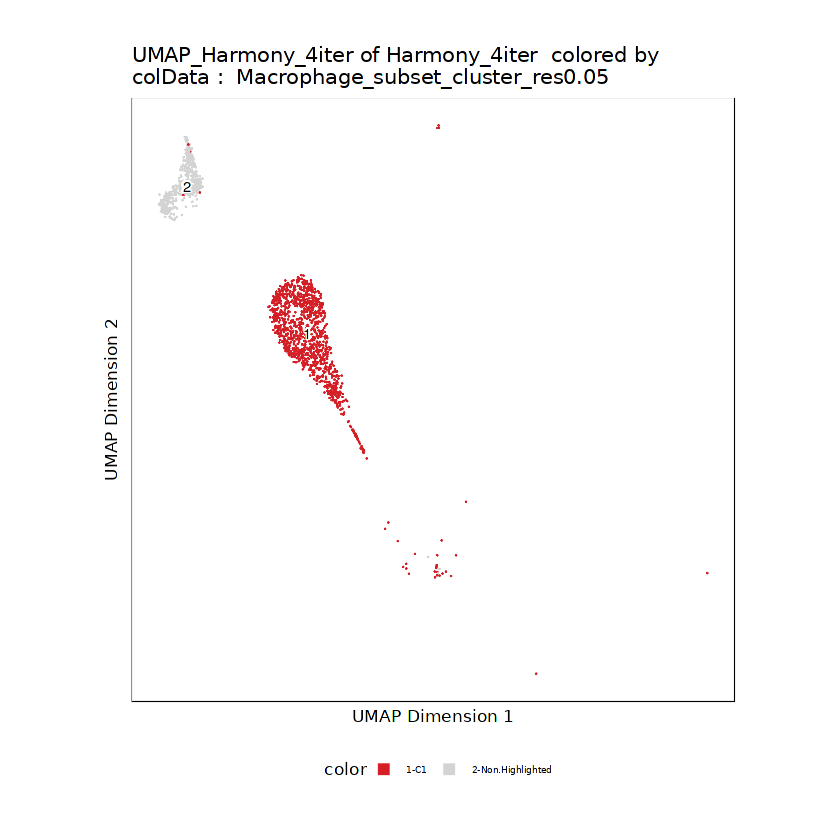

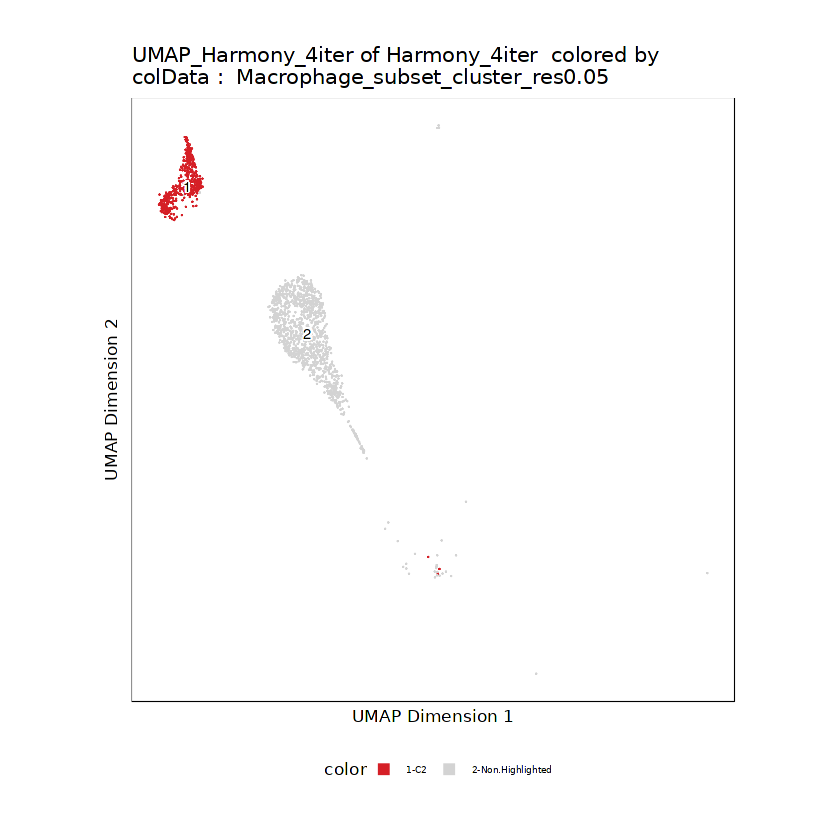

In [133]:
plotEmbedding(macrophage_subset, embedding = 'UMAP_Harmony_4iter', colorBy = 'cellColData', name = 'Macrophage_subset_cluster_res0.05', 
              highlightCells = getCellNames(macrophage_subset[macrophage_subset$Macrophage_subset_cluster_res0.06=='C1']))
plotEmbedding(macrophage_subset, embedding = 'UMAP_Harmony_4iter', colorBy = 'cellColData', name = 'Macrophage_subset_cluster_res0.05', 
              highlightCells = getCellNames(macrophage_subset[macrophage_subset$Macrophage_subset_cluster_res0.06=='C2']))

#### Add subclusters to main object as new clusters

In [134]:
length(unique(projAging3$Harmony_4iter_Clusters_res0.2))

[1] 9

In [141]:
MSC_C1_idx <- which(getCellNames(projAging3) %in% getCellNames(MSC_subset[MSC_subset$MSC_subset_cluster_res0.06=='C1']))
MSC_C2_idx <- which(getCellNames(projAging3) %in% getCellNames(MSC_subset[MSC_subset$MSC_subset_cluster_res0.06=='C2']))

In [139]:
macrophage_C1_idx <- which(getCellNames(projAging3) %in% getCellNames(macrophage_subset[macrophage_subset$Macrophage_subset_cluster_res0.05=='C1']))
macrophage_C2_idx <- which(getCellNames(projAging3) %in% getCellNames(macrophage_subset[macrophage_subset$Macrophage_subset_cluster_res0.05=='C2']))

In [136]:
projAging3$New_Harmony_4iter_Clusters_res0.2 <- projAging3$Harmony_4iter_Clusters_res0.2

In [145]:
projAging3$New_Harmony_4iter_Clusters_res0.2[MSC_C1_idx] <- 'C1.1'
projAging3$New_Harmony_4iter_Clusters_res0.2[MSC_C2_idx] <- 'C1.2'
projAging3$New_Harmony_4iter_Clusters_res0.2[macrophage_C1_idx] <- 'C8.1'
projAging3$New_Harmony_4iter_Clusters_res0.2[macrophage_C2_idx] <- 'C8.2'

In [146]:
table(projAging3$Harmony_4iter_Clusters_res0.2, projAging3$New_Harmony_4iter_Clusters_res0.2)

    
     C1.1 C1.2   C2   C3   C4   C5   C6   C7 C8.1 C8.2   C9
  C1 5281  628    0    0    0    0    0    0    0    0    0
  C2    0    0 2310    0    0    0    0    0    0    0    0
  C3    0    0    0 4301    0    0    0    0    0    0    0
  C4    0    0    0    0  997    0    0    0    0    0    0
  C5    0    0    0    0    0 3823    0    0    0    0    0
  C6    0    0    0    0    0    0 2458    0    0    0    0
  C7    0    0    0    0    0    0    0  785    0    0    0
  C8    0    0    0    0    0    0    0    0 1189  469    0
  C9    0    0    0    0    0    0    0    0    0    0 2689

## Make new plots

In [153]:
plt_list <- lapply(paste0('res',c(0.1,0.2,0.3)), function(x) 
    plotEmbedding(projAging3, embedding="UMAP_Harmony_4iter", colorBy="cellColData", name=paste0("Harmony_4iter_Clusters_", x)))
plt_list[[4]] <- plotEmbedding(projAging3, embedding="UMAP_Harmony_4iter", colorBy="cellColData", name="New_Harmony_4iter_Clusters_res0.2")

plotPDF(plotList = plt_list, 
        name = "Plot-New-UMAP-ATAC-Clustering-Harmony_4iter.pdf", 
        ArchRProj = projAging3, 
        addDOC = FALSE, width = 4, height = 4)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c3329ceb5-Date-2022-12-23_Time-04-18-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c3329ceb5-Date-2022-12-23_Time-04-18-09.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c3a32b9be-Date-2022-12-23_Time-04-18-12.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c3a32b9be-Date-2022-12-23_Time-04-18-12.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-f56c185842ab-Date-2022-12-23_Time-04-18-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-f56c185842ab-Date-2022-12-23_Time-04-

# Marker genes per cluster

**res 0.2 for Harmony_4iter and 0.3 for Harmony_Age**

In [147]:
Harmony_4iter_markersGS <- getMarkerFeatures(
    ArchRProj = projAging3, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "New_Harmony_4iter_Clusters_res0.2",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-f56c5053f490-Date-2022-12-23_Time-03-37-54.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2022-12-23 03:37:55 : Matching Known Biases, 0.003 mins elapsed.

###########
2022-12-23 03:41:41 : Completed Pairwise Tests, 3.77 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-f56c5053f490-Date-2022-12-23_Time-03-37-54.log



In [56]:
Harmony_Age_markersGS <- getMarkerFeatures(
    ArchRProj = projAging3, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Harmony_Age_Clusters_res0.3",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-f56c427523e6-Date-2022-12-23_Time-01-15-13.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2022-12-23 01:15:13 : Matching Known Biases, 0.003 mins elapsed.

###########
2022-12-23 01:20:05 : Completed Pairwise Tests, 4.867 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-f56c427523e6-Date-2022-12-23_Time-01-15-13.log



In [148]:
saveRDS(Harmony_4iter_markersGS, file.path(projdir, 'output', 'New_Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS'))
saveRDS(Harmony_Age_markersGS, file.path(projdir, 'output', 'Harmony_Age_Clusters_res0.3_cluster_markersGS.RDS'))

## Look at marker genes

In [149]:
Harmony_4iter_markerList <- getMarkers(Harmony_4iter_markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")
Harmony_4iter_markerListDF <- do.call(rbind, lapply(1:length(Harmony_4iter_markerList), function(x) cbind(Harmony_4iter_markerList[[x]], cluster = names(Harmony_4iter_markerList[x]))))

                                                    
Harmony_Age_markerList <- getMarkers(Harmony_Age_markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")
Harmony_Age_markerListDF <- do.call(rbind, lapply(1:length(Harmony_Age_markerList), function(x) cbind(Harmony_Age_markerList[[x]], cluster = names(Harmony_Age_markerList[x]))))

In [158]:
Harmony_4iter_markerListDF[Harmony_4iter_markerListDF$name %in% c('Nkg7','Ccl5','Cd8b1'),]

DataFrame with 3 rows and 10 columns
      seqnames    start      end  strand    name     idx    Log2FC         FDR
         <Rle>  <array>  <array> <array> <array> <array> <numeric>   <numeric>
19390     chr7 43437138 43438246       1    Nkg7     794   3.20631 2.88836e-44
3540     chr11 83530518 83525778       2    Ccl5    1035   2.48546 2.09784e-38
17804     chr6 71322812 71337451       1   Cd8b1     517   2.95244 2.54533e-27
       MeanDiff     cluster
      <numeric> <character>
19390  1.016764          C6
3540   1.120241          C6
17804  0.837438          C6

In [156]:
Harmony_4iter_markerListDF[Harmony_4iter_markerListDF$cluster=='C8.2','name']

[1] "S100a8"        "Trem1"         "S100a9"        "Mirt2"        
   [5] "Cd300lb"       "Ccl6"          "Asprv1"        "Clec4d"       
   [9] "A530064D06Rik" "Ccl3"          "Spatc1"        "Slc7a11"      
  [13] "Cxcr2"         "Gsr"           "Amer2"         "Ncf2"         
  [17] "Cd300a"        "Acod1"         "Retnlb"        "Ankrd33b"     
  [21] "Samsn1"        "Dhrs9"         "Retn"          "Cd33"         
  [25] "Klhdc4"        "Ccr1"          "Mcemp1"        "Gm13986"      
  [29] "Itgb2"         "Adam8"         "Ptafr"         "Hdc"          
  [33] "E230016K23Rik" "Nt5c2"         "Csf3r"         "Ptgs2os2"     
  [37] "6430531B16Rik" "Syk"           "Prkcb"         "Osm"          
  [41] "4933432I03Rik" "Antxr2"        "Ngp"           "F930017D23Rik"
  [45] "Alox5"         "Il1b"          "Trub2"         "Il1rn"        
  [49] "Ncf1"          "Mir7678"       "C5ar1"         "Pik3ap1"      
  [53] "Lilrb4a"       "Mir142"        "Slc16a3"       "Glrx"         
  [57] "Stxbp2"        "Il1bos"        "Hcar2"         "Xkr5"         
  [61] "Gucy2c"        "Plbd1"         "Gda"           "Gsdme"        
  [65] "Tacstd2"       "Tex12"         "Lilr4b"        "Rab11fip1"    
  [69] "Fcgr4"         "Gm16894"       "Hp"            "Cd177"        
  [73] "Gm19510"       "Fpr1"          "Ncf4"          "Clec5a"       
  [77] "4930463O16Rik" "Il1a"          "Ccdc57"        "Pgd"          
  [81] "Lcp1"          "Selp"          "Itgam"         "Prkar2b"      
  [85] "Zfp608"        "Cxcl5"         "Fgd3"          "Spi1"         
  [89] "Cd300lf"       "Alox5ap"       "Syne1"         "C5ar2"        
  [93] "Tbc1d8"        "Mir5623"       "Tchhl1"        "Tyrobp"       
  [97] "Mapk4"         "Cd300ld"       "Rin3"          "1700112H15Rik"
 [101] "Slco4c1"       "Dmrtb1"        "Srgn"          "Stx11"        
 [105] "Nhlh2"         "Arsg"          "Pla1a"         "G0s2"         
 [109] "Ctsd"          "Retnlg"        "Chst13"        "Tspoap1"      
 [113] "Trem3"         "Foxd4"         "Tnfrsf21"      "Themis2"      
 [117] "E130008D07Rik" "Entpd1"        "Fam162b"       "Gpr141"       
 [121] "F830045P16Rik" "Pla2g7"        "Rhog"          "Retnla"       
 [125] "Mospd4"        "St3gal5"       "Tbc1d2b"       "Itprip"       
 [129] "Cxcl15"        "Mmp9"          "Panct2"        "Ppp1r42"      
 [133] "Nfe2"          "Atp8b4"        "Cd300c"        "Gm32511"      
 [137] "Il1f10"        "Chst11"        "Myo1f"         "Ifitm3"       
 [141] "Pira1"         "Lamb3"         "Sdhd"          "Apbb1ip"      
 [145] "B430306N03Rik" "Ccm2l"         "4930509K18Rik" "Rassf6"       
 [149] "Hcst"          "Cdkl4"         "Fth1"          "Pygl"         
 [153] "Nfkbid"        "Clec4a2"       "Slc2a3"        "Mmp27"        
 [157] "Slc6a6"        "Cebpe"         "Tal2"          "Pilra"        
 [161] "Kif1bp"        "Mir744"        "Naip2"         "Rgs2"         
 [165] "Sorl1"         "Gm21859"       "Baz2b"         "Serpinb2"     
 [169] "Cd24a"         "Mir142b"       "Tex33"         "B230303A05Rik"
 [173] "Ppp1r3b"       "Defb40"        "Abo"           "Vsir"         
 [177] "Dock5"         "5830432E09Rik" "Mxd1"          "Txn2"         
 [181] "Plek"          "Il1rap"        "Il15"          "Map3k9"       
 [185] "Ostf1"         "Sgms2"         "Tpd52"         "Gm9733"       
 [189] "Cnnm2"         "Cxcr4"         "Map3k20"       "Ly6g"         
 [193] "Adgb"          "Fmnl1"         "Gng12"         "Ptpre"        
 [197] "Glipr1"        "Tlr6"          "Hcar1"         "Ctcfl"        
 [201] "Mir7062"       "Ankrd22"       "Rab37"         "Adap1"        
 [205] "Dmxl2"         "Gm15348"       "Sema4d"        "Notch2"       
 [209] "F5"            "Platr7"        "Mefv"          "Tbc1d2"       
 [213] "Rnf149"        "Hk2"           "Ifitm1"        "Rab7"         
 [217] "Dtd1"          "Mogat2"        "Lyz2"          "Grm1"         
 [221] "Ltf"           "Fxyd5"         "Lrrk2"         "Lyz1"         
 [225] "Slc27a2"       "Fgd

## Plot marker gene heatmaps

In [150]:
Harmony_4iter_hmp <- plotMarkerHeatmap(
    seMarker = Harmony_4iter_markersGS, 
    cutOff = "FDR <= 0.01 & Log2FC >= 1.25",
    labelMarkers = markerGenes,
    transpose = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-f56c5887c7ad-Date-2022-12-23_Time-03-42-08.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1.1:

	Il1rl2, 4930521E06Rik, Col3a1, Aox1, Crygd, Crygc, Inha, Irs1, Efhd1, Cops8, Crocc2, Sned1, Serpinb5, Mir6346, Inhbb

C1.2:

	Khdc1b, 4931428L18Rik, Cnga3, Npas2, 1500015O10Rik, BC055402, Adam23, Dytn, 4933402D24Rik, Fn1, Apol7d, Plcd4, Htr2b, Otos, Rnf152

C2:

	Mir6349, Myo1b, Cps1, Igfbp2, Mir6351, Prkag3, Cfap65, Mlph, Cdk18, Etnk2, Lmod1, Mir488, Tnn, Ildr2, Rgs5

C3:

	Sox17, Prex2, Crisp4, Defb44-ps, 4933415F23Rik, 9330175M20Rik, Cavin2, 9530026F06Rik, Fam124b, 1700067G17Rik, Sh3bp4, Iqca, Serpinb3c, D830032E09Rik, Mir135b

C4:

	Gm17644, Msc, Col19a1, Gm29669, Pax3, Mogat1, Dis3l2, Chrnd, C030007H22Rik, Asb18, Rab17, Klhl30, Erfe, Nfasc, Gm10538

C5:

	Slc18a2, Skint4, Vmn1r73, Aim2, Fyb, Ms4a4b, Cxcr3, Ly9, Il7r, Dmrta1, Sox17, 2610203C22Rik, Sgk3, Mcmdc2, Ppp1r42

C6:

	Nck2, Stat4,

 [1] "Fabp4"  "Cdh5"   "Pecam1" "Gsn"    "Col3a1" "Pdgfra" "Thbs4"  "Fmod"  
 [9] "Tnmd"   "Pax7"   "Sdc4"   "Myod1"  "Myh11"  "Synpo2" "Acta2"  "Rgs5"  
[17] "Pdgfrb" "Kcnj8"  "Cd74"   "H2-Aa"  "Bach2"  "Ptpn22" "Il7r"   "Ptprc" 
[25] "Lyz2"   "Ctsb"   "Ctsz"   "S100a9" "S100a8" "Mmp9"   "Cdh19"  "Ptn"   
[33] "Postn"  "Bnc2"   "Apod"   "Itgb4"  "Mpz"    "Plp1"   "Mbp"    "Hba-a1"
[41] "Hba-a2" "Hbb-bs"


Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-f56c5887c7ad-Date-2022-12-23_Time-03-42-08.log



In [70]:
Harmony_Age_hmp <- plotMarkerHeatmap(
    seMarker = Harmony_Age_markersGS, 
    cutOff = "FDR <= 0.01 & Log2FC >= 1.25",
    labelMarkers = markerGenes,
    transpose = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-f56cf331a51-Date-2022-12-23_Time-01-35-47.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Myo1b, Igfbp2, Igfbp5, Asic4, Mlph, Cdk18, Gm19461, Lmod1, Mir488, Ccdc190, Pcp4l1, Olfr248, Gm2061, Akap12, Taar7d

C2:

	Mir6341, Gm17644, Trpa1, Lincmd1, Gm29669, Npas2, Slc9a2, Stk-ps2, Aox4, Zdbf2, Tmbim1, Sgpp2, Mogat1, Dis3l2, Alppl2

C3:

	4931428L18Rik, Il1rl2, Col3a1, Col5a2, Spats2l, Aox1, Aox2, Crygd, Tnp1, D530049I02Rik, Gm17751, Efhd1, Cops8, Twist2, Agxt

C4:

	1500015O10Rik, BC055402, Dytn, Crygc, Htr2b, Ngef, Fmod, Gm5532, Brinp2, Dnm3, Grem2, 9130409I23Rik, Tgfb2, Aig1, Arfgef3

C5:

	Gm20172, 9330175M20Rik, Cavin2, Gbx2, Mir135b, Nr5a2, Gm26641, F11r, Olfr218, C130074G19Rik, Cd34, Plekhg1, Myct1, Nepn, Gm36595

C6:

	B3gat2, Lmbrd1, Als2cr11, Lancl1, D1Ertd622e, Serpinb11, Ifi209, Olfr424, Kmo, Exo1, Lefty1, Gpatch2, Kctd3, Cr1l, Ltv1

C7:

	Tmem9, Spag5, AI662270, Ndufb9, Cps

 [1] "Fabp4"  "Cdh5"   "Pecam1" "Gsn"    "Col3a1" "Pdgfra" "Thbs4"  "Fmod"  
 [9] "Tnmd"   "Pax7"   "Sdc4"   "Myod1"  "Myh11"  "Synpo2" "Acta2"  "Rgs5"  
[17] "Pdgfrb" "Kcnj8"  "Cd74"   "H2-Aa"  "Bach2"  "Ptpn22" "Il7r"   "Ptprc" 
[25] "Lyz2"   "Ctsb"   "Ctsz"   "S100a9" "S100a8" "Mmp9"   "Cdh19"  "Ptn"   
[33] "Postn"  "Bnc2"   "Apod"   "Itgb4"  "Mpz"    "Plp1"   "Mbp"    "Hba-a1"
[41] "Hba-a2" "Hbb-bs"


Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-f56cf331a51-Date-2022-12-23_Time-01-35-47.log



Plotting ComplexHeatmap!



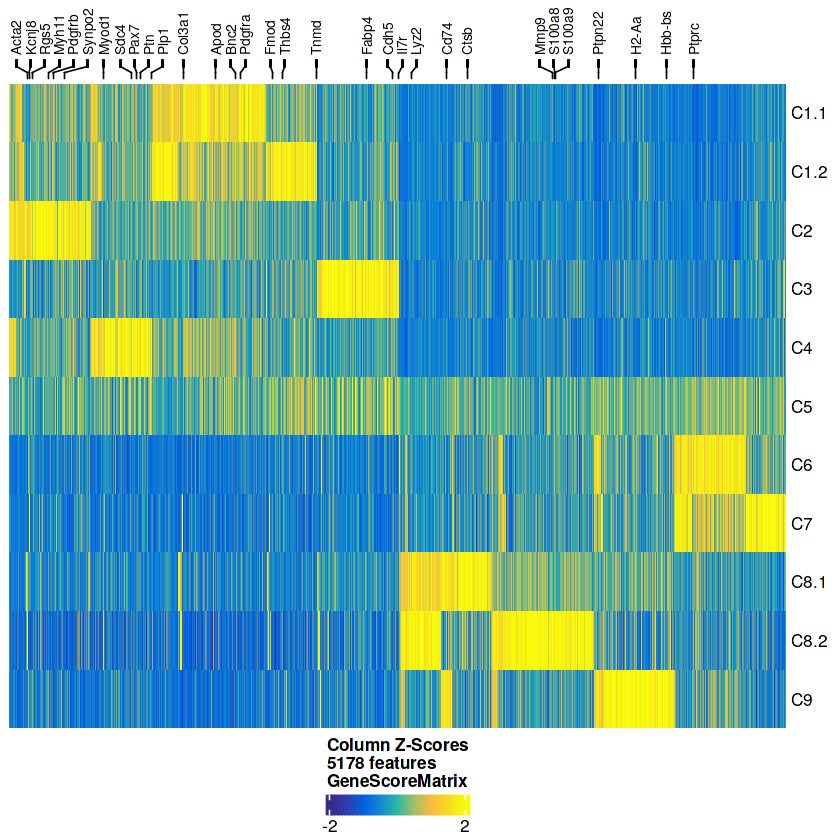

In [151]:
plt <- ComplexHeatmap::draw(Harmony_4iter_hmp, heatmap_legend_side = "bot", annotation_legend_side = "bot")
plotPDF(plt, name = "New_Harmony_4iter_GeneScores-Marker-Heatmap", width = 8, height = 6, ArchRProj = projAging3, addDOC = FALSE)

Plotting ComplexHeatmap!



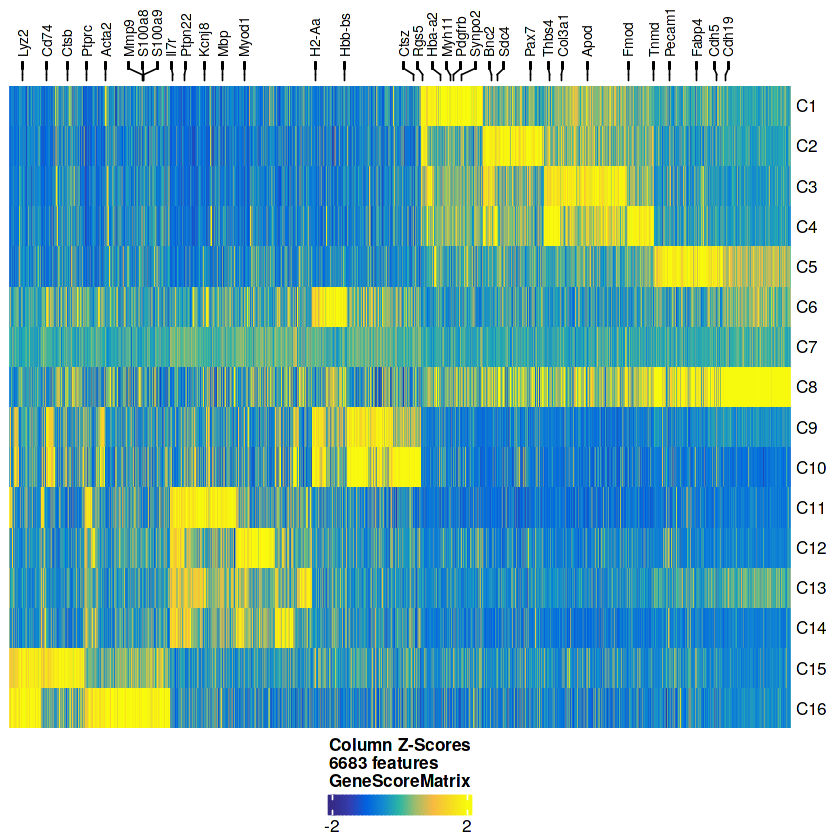

In [79]:
plt <- ComplexHeatmap::draw(Harmony_Age_hmp, heatmap_legend_side = "bot", annotation_legend_side = "bot")
plotPDF(plt, name = "Harmony_Age_GeneScores-Marker-Heatmap", width = 8, height = 6, ArchRProj = projAging3, addDOC = FALSE)

In [152]:
saveArchRProject(ArchRProj = projAging3, outputDirectory = file.path(projdir,"Save-projAging3-01"), load = FALSE)
#projAging3 = readRDS('/nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/Save-projAging3-01/Save-ArchR-Project.rds')

Copying ArchRProject to new outputDirectory : /nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/Save-projAging3-01

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

Dropping ImputeWeights...

Copying Other Files...

Copying Other Files (1 of 22): Aged

Copying Other Files (2 of 22): Aged_v2

Copying Other Files (3 of 22): Embeddings

Copying Other Files (4 of 22): Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (5 of 22): Harmony_Age_Clusters_res0.3_cluster_markersGS.RDS

Copying Other Files (6 of 22): IterativeLSI

Copying Other Files (7 of 22): IterativeLSI_4iter

Copying Other Files (8 of 22): IterativeLSI_4iter_10kvar

Copying Other Files (9 of 22): New_Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (10 of 22): Plots

Copying Other Files (11 of 22): projAging1-01.RDS

Copying Other Files (12 of 22): projAging2-01-do